In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)

In [3]:
df_IN = df[df['job_country'] == 'India']
df_skills = df_IN.explode('job_skills')

df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size().reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

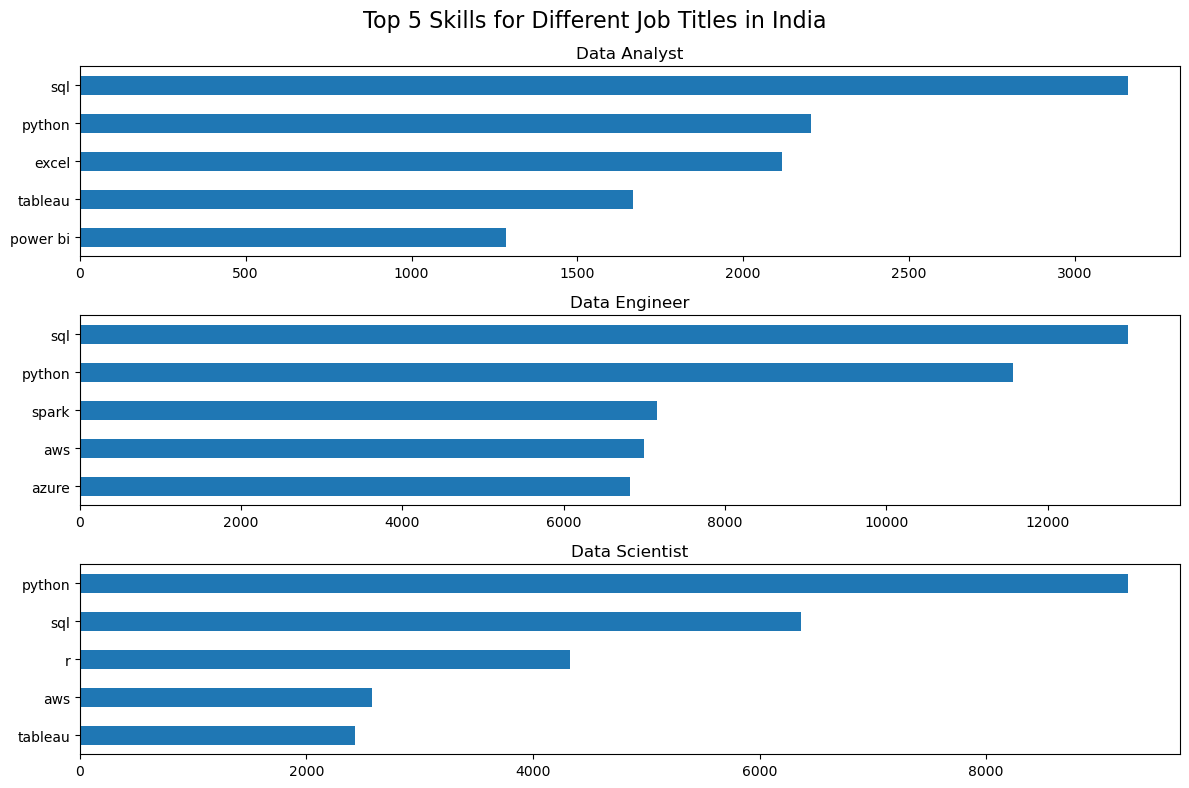

In [4]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

fig, ax = plt.subplots(len(job_titles), 1, figsize=(12, 8))

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], legend=False, title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')

fig.suptitle('Top 5 Skills for Different Job Titles in India', fontsize=16)
plt.tight_layout()


In [5]:
df_job_title_count = df_IN['job_title_short'].value_counts().reset_index(name='jobs_total')
df_skills_per = pd.merge(df_job_title_count, df_skills_count, how='left', on='job_title_short')

df_skills_per['skill_percentage'] = (df_skills_per['skill_count'] / df_skills_per['jobs_total']) * 100

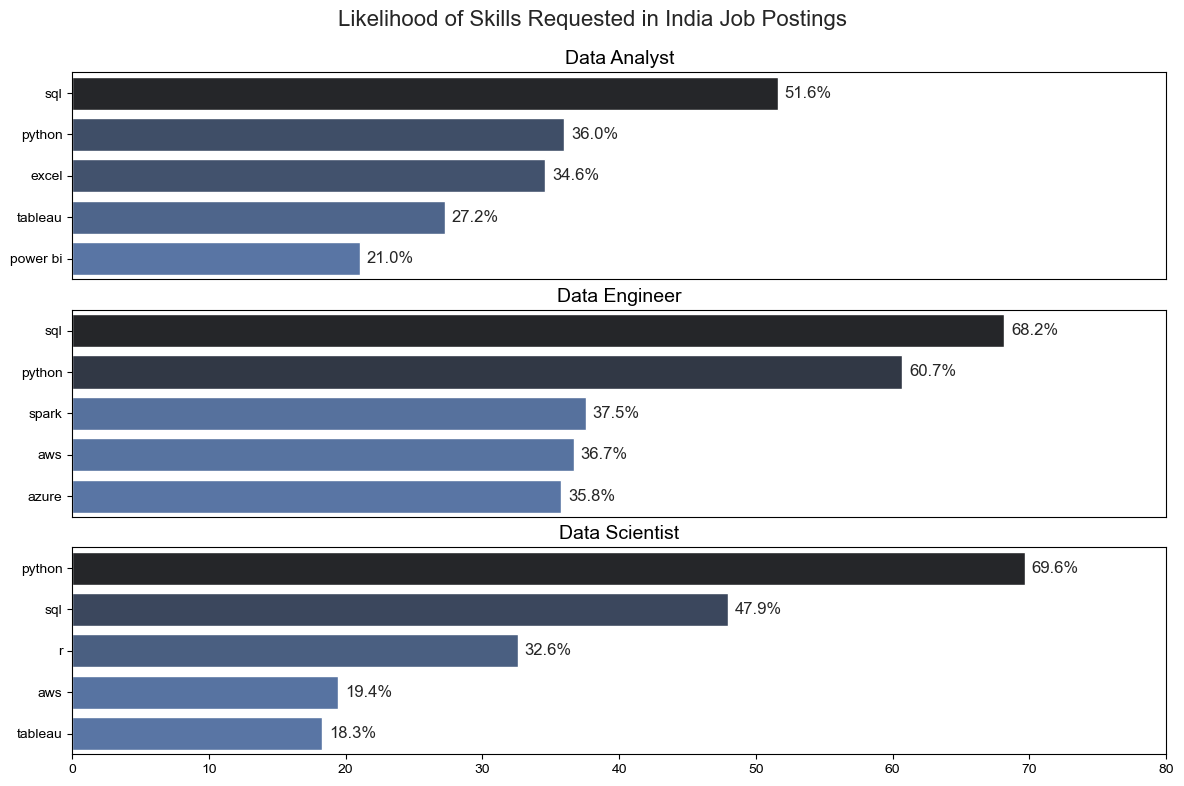

In [6]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(12, 8))
sns.set_theme(style="ticks")

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_per[df_skills_per['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skill_percentage', ax=ax[i], legend=False, title=job_title)
    sns.barplot(data=df_plot, x='skill_percentage', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title, fontsize=14)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 80)

    for n, v in enumerate(df_plot['skill_percentage']):
        ax[i].text(v+0.5, n, f'{v:.1f}%', va='center')

    if i != len(job_titles) - 1: 
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in India Job Postings', fontsize=16)
plt.tight_layout(h_pad=0.5)
plt.show()
